### Nhóm 12
* 21120449 - Nguyễn Văn Hậu
* 21120464 - Nguyễn Quốc Hưng

---





# 1. Mô tả đồ án

---



Triển khai và tối ưu mạng thần kinh nhân tạo truyền thống Artificial Neural Network (ANN) phân loại hình ảnh từ tập dữ liệu Fashion MNIST, giúp nhận dạng và phân loại các loại trang phục như áo thun, quần, giày, túi xách,...

**Input:**

Hình ảnh grayscale 28x28 pixel từ tập dữ liệu Fashion MNIST. Mỗi hình ảnh đại diện cho một loại trang phục.
**Output:**

Một trong 10 nhãn (`label`) tương ứng với các loại trang phục:

| Label | Clothing Item       |
|-------|----------------------|
| 0     | T-shirt/top         |
| 1     | Trousers            |
| 2     | Pullover            |
| 3     | Dress               |
| 4     | Coat                |
| 5     | Sandal              |
| 6     | Shirt               |
| 7     | Sneaker             |
| 8     | Bag                 |
| 9     | Ankle boot          |

**Use cases**
* Thương mại điện tử: Phân loại tự động hình ảnh sản phẩm để hỗ trợ tìm kiếm và sắp xếp hàng hóa.
* Hệ thống quản lý kho: Theo dõi và quản lý hàng tồn kho theo danh mục.
* Phân tích thời trang: Nhận diện xu hướng thời trang thông qua dữ liệu hình ảnh.
* Tích hợp chatbot AI: Tìm kiếm sản phẩm dựa trên hình ảnh do người dùng tải lên.

Nếu ANN được triển khai trong môi trường thời gian thực, như ứng dụng thương mại điện tử hoặc robot nhận diện, cần tối ưu tốc độ &rarr; `CUDA C++`

---





# 2. Triển khai tuần tự


### 1.Thiết kế:
  * Tiền xử lý dữ liệu: chuẩn hóa giá trị pixel: pixel_normalized=  $\frac{pixelValue}{255.0}$
  * Cấu hình mạng neural:
    * input layer: 784 - Mỗi phần tử biểu thị pixel vị trí tương ứng.
    * 2 hidden layer: 128
    * output layer: 10
  * Khởi tạo mạng neural: các lớp được tạo động với trọng số được khởi tạo ngẫu nhiên theo phân phối chuẩn.

##2. FeedForward:
<p align="center">$Z = XW + b$</p>

### ReLU Activation
<p align="center">\[ \text{ReLU}(z) = \max(0, z) \]</p>

### Apply softmax in the output

<p align="center">\[ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} \]</p>

### Tính toán hàm mất mát cross-entropy

<p align="center">\[ L = - \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(p_{i,c}) \]</p>

##3. Backpropagation

### Error term (Phần sai số)

<p align="center">\[ \delta^{[L]} = \mathbf{P} - \mathbf{Y} \]</p>

>>$P$ nhãn giự đoán.

>>$Y$ nhãn thực tế.

### Gradient for output layer (bias & weight gradient)

<p align="center">\[ \frac{\partial L}{\partial \mathbf{W}^{[L]}} = \frac{1}{N} (\mathbf{A}^{[L-1]})^{T} \delta^{[L]} \]</p>

<p align="center">\[ \frac{\partial L}{\partial \mathbf{b}^{[L]}} = \frac{1}{N} \sum_{i=1}^{N} \delta^{[L]}_{i} \]</p>

Trong đó $\mathbf{A}^{[L-1]}$ là activation từ layer L-1, N là batch size

### For hidden layer
<p align="center">$ \delta^{[l]} = (\delta^{[l+1]} \mathbf{W}^{[l+1]}) \odot \text{ReLU}'(\mathbf{Z}^{[l]}) $</p>

<p align="center">\[ \frac{\partial L}{\partial \mathbf{W}^{[L]}} = \frac{1}{N} (\mathbf{A}^{[L-1]})^{T} \delta^{[L]} \]</p>

<p align="center">\[ \frac{\partial L}{\partial \mathbf{b}^{[L]}} = \frac{1}{N} \sum_{i=1}^{N} \delta^{[L]}_{i} \]</p>


### Cập nhật weight và bias

<p align="center">\[ \mathbf{W}^{[L]} = \mathbf{W}^{[L]} - \eta \frac{\partial L}{\partial \mathbf{W}^{[L]}} \]</p>

<p align="center">\[ \mathbf{b}^{[L]} = \mathbf{b}^{[L]} - \eta \frac{\partial L}{\partial \mathbf{b}^{[L]}} \]</p>

Trong đó $\eta$ là learning rate

---











Đánh giá:

* Mô tả thử nghiệm:
  * Thực thi file .cpp
  * Chạy file thực thi



---



*Setup enviroment and dataset*

In [ ]:
!apt-get install g++

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
g++ set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [1]:
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train
x_test = x_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
# Convert to pandas DataFrames
x_train_subset_pd = pd.DataFrame(x_train)
y_train_subset_pd = pd.DataFrame(y_train)
# Save to CSV files
x_train_subset_pd.to_csv('x_train.csv', index=False, header=False)
y_train_subset_pd.to_csv('y_train.csv', index=False, header=False)
# Convert to pandas DataFrames
x_test_subset_pd = pd.DataFrame(x_test)
y_test_subset_pd = pd.DataFrame(y_test)
# Save to CSV files
x_test_subset_pd.to_csv('x_test.csv', index=False, header=False)
y_test_subset_pd.to_csv('y_test.csv', index=False, header=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
!g++ -g CPU_V2.cpp -o output_CPU



> Run code



In [ ]:
!./output_CPU

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.660987
Epoch 2 - Loss: 0.46589
Epoch 3 - Loss: 0.421897
Epoch 4 - Loss: 0.394394
Epoch 5 - Loss: 0.373926
Epoch 6 - Loss: 0.357628
Epoch 7 - Loss: 0.344016
Epoch 8 - Loss: 0.332486
Epoch 9 - Loss: 0.322408
Epoch 10 - Loss: 0.313408
Training completed in 1127 seconds.
Model saved to model_CPU.bin
Model loaded from model_CPU.bin
Test Accuracy: 86.72%


* **Nhận xét**
  * Huấn luyện mô hình tốn 1127 giây &rarr; tốn nhiều thời gian.
  * Test accuracy: 86,72%, khá cao.

# 3. Triển khai song song hóa

Phân tích:
  * Phần tốn thời gian nhất : `forward`, `back_ward` và `update_weight`
  * `forawrd` : Các phép tính của từng lớp độc lập với từng nơ-ron trong lớp đó &rarr; các phép toán trên các nơ-ron khác nhau có thể được thực hiện đồng thời.
  * `backward` : tương tự `forward`
  * `updateweight` : Việc cập nhật weight và bias là độc lập và có thể được thực hiện song song.

Thiết kế:
  * `forward_kernel` : Mỗi thread xử lí 1 `output_neron`.
  * `backward_kernel` : Mỗi thread xử lí 1 `input_neron`.
  * `update_weight_kernel` : Mỗi thread xử lí 1 `output_neron`.

Đánh giá
  * Mô tả thử nghiệm
    * Chạy tệp thực thi.
    * So sánh với phiên bản trước.
    * Phân tích thông số bằng nvprof.


* Kết quả sau khi chạy code

In [ ]:
!nvcc GPUFinal1.cu -o output_GPU

In [ ]:
!./output_GPU

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.639579
Epoch 2 - Loss: 0.451052
Epoch 3 - Loss: 0.407226
Epoch 4 - Loss: 0.380254
Epoch 5 - Loss: 0.360348
Epoch 6 - Loss: 0.344493
Epoch 7 - Loss: 0.331209
Epoch 8 - Loss: 0.319698
Epoch 9 - Loss: 0.309588
Epoch 10 - Loss: 0.300073
Processing time: 148098 ms
Test Accuracy: 87.18%


In [ ]:
!nvprof ./output_GPU

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==4997== NVPROF is profiling process 4997, command: ./output_GPU
Epoch 1 - Loss: 0.625574
Epoch 2 - Loss: 0.453396
Epoch 3 - Loss: 0.4107
Epoch 4 - Loss: 0.383252
Epoch 5 - Loss: 0.36294
Epoch 6 - Loss: 0.346765
Epoch 7 - Loss: 0.332967
Epoch 8 - Loss: 0.321468
Epoch 9 - Loss: 0.310946
Epoch 10 - Loss: 0.301674
Processing time: 183198 ms
==4997== Profiling application: ./output_GPU
==4997== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   48.23%  19.9730s    112422  177.66us  19.360us  987.78us  update_weights_kernel(float*, float*, float const *, float const *, float, int, int, int)
                   22.75%  9.42299s   1349078  6.9840us     351ns  47.358us  [CUDA memcpy HtoD]
                   14.89%  6.16507s    112425  54.837us  7.9350us  294.14us  forward_kernel1(float const *, float*, float const *, float const *, int, int, int)
      

* Nhận xét : Kết quả có sự cải thiện so với phiên bản `Host` do phần tính toán được song song hóa.

# 4. Triển khai và tối ưu song song hóa

Phân tích phiên bản triển khai song song hóa đầu tiên:

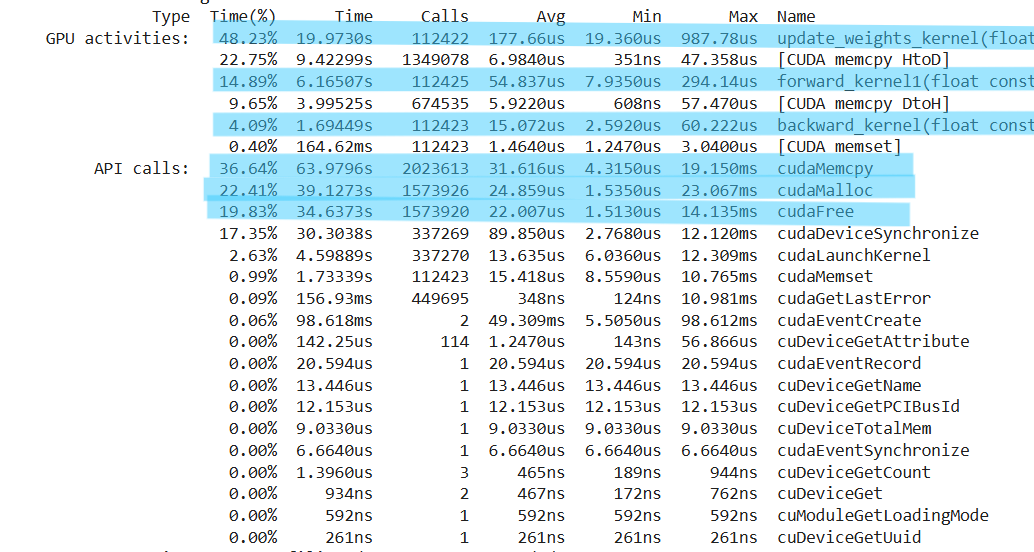

* Vấn đề: cudaMemCpy overhead.
* Tập trung tối ưu các task tốn thời gian.

## 4.1. Phiên bản 1

Phân tích:
* Các `kernel` ở phiên bản song song đầu tiên truy xuất trực tiếp bằng GMEM &rarr; delay.
* `update_weight_kernel` phải sử dụng 1 vòng for để tính toán &rarr; sử dụng thread không hiệu quả.

Ý tưởng:
* Tối ưu hóa `update_weight_kernel`: sử dụng `input_size` * `output_size` thread thay vì `output_size` thread.
* Sử dụng SMEM, CMEM trên `forward_kernel`, `backward_kernel` và `update_weight_kernel`.

Đánh giá:
* Mô tả thử nghiệm
  * Chạy tệp thực thi
  * Phân tích thông số bằng nvprof
  * So sánh với phiên bản song song đầu tiên

  * Kết quả sau khi chạy code

In [ ]:
!nvcc GPU_Optimize1.cu -o op1

In [ ]:
!./op1

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.64435
Epoch 2 - Loss: 0.45935
Epoch 3 - Loss: 0.413326
Epoch 4 - Loss: 0.385231
Epoch 5 - Loss: 0.364826
Epoch 6 - Loss: 0.348394
Epoch 7 - Loss: 0.334888
Epoch 8 - Loss: 0.32318
Epoch 9 - Loss: 0.312885
Epoch 10 - Loss: 0.303737
Processing time: 127861 ms
Test Accuracy: 87.02%


In [ ]:
!nvprof ./op1

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==7022== NVPROF is profiling process 7022, command: ./op1
Epoch 1 - Loss: 0.645524
Epoch 2 - Loss: 0.460259
Epoch 3 - Loss: 0.4151
Epoch 4 - Loss: 0.387045
Epoch 5 - Loss: 0.366558
Epoch 6 - Loss: 0.350644
Epoch 7 - Loss: 0.337145
Epoch 8 - Loss: 0.325927
Epoch 9 - Loss: 0.315941
Epoch 10 - Loss: 0.306602
Processing time: 160380 ms
Test Accuracy: 87.06%
==7022== Profiling application: ./op1
==7022== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   43.52%  9.74293s   1350009  7.2160us     544ns  6.5810ms  [CUDA memcpy HtoD]
                   23.71%  5.30766s    112503  47.177us  5.9510us  47.840ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   19.78%  4.42726s    675003  6.5580us  1.2480us  2.4228ms  [CUDA memcpy DtoH]
                    9.89%  2.21435s    112500  19.683us  4.1910us  50.591us  backwa

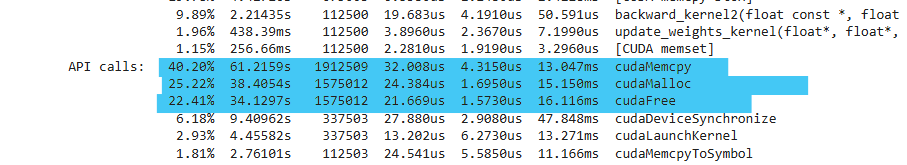

* Nhận xét:
  * Thời gian chạy của `update_weight_kernel` giảm đáng kể (19s &rarr; 0.5s).
  * `forward_kernel` và `backward_kernel` có thời gian chạy giảm 1 phần.

## 4.2. Phiên bản 2

Phân tích:
* Ở các phiên bản trước, việc triển khai các `kernel` là độc lập &rarr; phải phân bổ và giải phóng nhiều lần.

Ý tưởng:
* Tái sử dụng GPU được phân bổ: Tái sử dụng bộ nhớ GPU được phân bổ thay vì phân bổ và giải phóng bộ nhớ ở mỗi layer.

Đánh giá:
* Mô tả thử nghiệm
    * Chạy tệp thực thi.
    * Phân tích thông số bằng nvprof.
    * So sánh với phiên bản song song trước đó.

* Kết quả sau khi chạy code

In [21]:
!nvcc GPU_Optimize2-Modify.cu -o op2

In [ ]:
!./op2 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.633853
Epoch 2 - Loss: 0.455709
Epoch 3 - Loss: 0.413549
Epoch 4 - Loss: 0.386822
Epoch 5 - Loss: 0.366953
Epoch 6 - Loss: 0.351047
Epoch 7 - Loss: 0.337448
Epoch 8 - Loss: 0.325806
Epoch 9 - Loss: 0.315637
Epoch 10 - Loss: 0.306509
Processing time: 14428.4 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 87.16%


In [ ]:
!nvprof ./op2 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==2217== NVPROF is profiling process 2217, command: ./op2 16
Epoch 1 - Loss: 0.62248
Epoch 2 - Loss: 0.449255
Epoch 3 - Loss: 0.406484
Epoch 4 - Loss: 0.38001
Epoch 5 - Loss: 0.360544
Epoch 6 - Loss: 0.345028
Epoch 7 - Loss: 0.332001
Epoch 8 - Loss: 0.320565
Epoch 9 - Loss: 0.31054
Epoch 10 - Loss: 0.301461
Processing time: 26320.2 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 86.98%
==2217== Profiling application: ./op2 16
==2217== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   52.79%  3.98037s    112503  35.380us  4.7040us  30.148ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   21.80%  1.64347s    112500  14.608us  2.9760us  58.848us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                    6.89%  519.18ms   

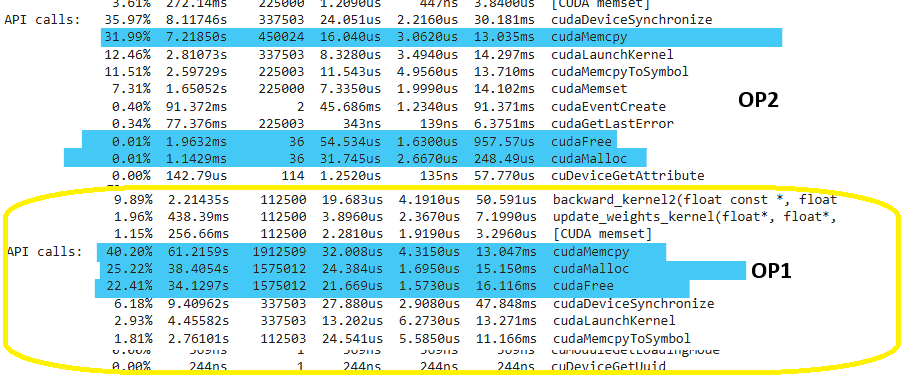

* Nhận xét: thời gian train model giảm đáng kể (160s &rarr; 14s).

## 4.3. Phiên bản 3

Phân tích:
* Việc tái sử dụng GPU thay vì giải phóng sẽ chiếm nhiều bộ nhớ
* Khi batch size tăng lên hoặc mạng trở nên phức tạp hơn &rarr; "overweight"
* Phần dữ liệu chiếm phần lớn bộ nhớ : `d_input` và `d_output` tăng theo `batch_size`

Ý tưởng tối ưu:
* Tái sử dụng GPU với các phần chiếm ít bộ nhớ GPU.
* Giải phóng `d_input` và `d_output` ngay khi sử dụng xong

Đánh giá:
* Mô tả thực nghiệm
    * Chạy tệp thực thi.
    * Phân tích thông số bằng nvprof.
    * So sánh với các phiên bản song song trước đó.

* Kết quả sau khi chạy code

In [ ]:
!nvcc GPU_Optimize3-Modify.cu -o op3

In [ ]:
!./op3 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.627318
Epoch 2 - Loss: 0.450951
Epoch 3 - Loss: 0.40756
Epoch 4 - Loss: 0.380914
Epoch 5 - Loss: 0.361577
Epoch 6 - Loss: 0.346044
Epoch 7 - Loss: 0.332988
Epoch 8 - Loss: 0.321606
Epoch 9 - Loss: 0.311742
Epoch 10 - Loss: 0.302655
Processing time: 18679.5 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 86.99%


In [ ]:
!nvprof ./op3 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==1592== NVPROF is profiling process 1592, command: ./op3 16
Epoch 1 - Loss: 0.631963
Epoch 2 - Loss: 0.456862
Epoch 3 - Loss: 0.413775
Epoch 4 - Loss: 0.386252
Epoch 5 - Loss: 0.365845
Epoch 6 - Loss: 0.349656
Epoch 7 - Loss: 0.335942
Epoch 8 - Loss: 0.324309
Epoch 9 - Loss: 0.313903
Epoch 10 - Loss: 0.304666
Processing time: 35214.3 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 86.96%
==1592== Profiling application: ./op3 16
==1592== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   52.10%  5.26820s    112503  46.827us  6.1750us  42.394ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   21.54%  2.17836s    112500  19.363us  3.9990us  59.167us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                    8.47%  856.39ms

* Nhận xét: tổng thời gian chạy chậm hơn vì phải phân bổ và giải phóng vùng nhớ `inputs` `output`.

## 4.4. Phiên bản 4

Phân tích:
* Các phiên bản trước chỉ sử dụng 1 stream (`stream 0`), lãng phí thời gian đợi `H2D` và `D2H` (Data transfer.

Ý tưởng: Sử dụng stream overlap các `kernel` với `H2D` và `D2H`.  
*Kết hợp Optimize 3 và stream*

Đánh giá:
* Mô tả thực nghiệm
    * Chạy tệp thực thi.
    * Phân tích thông số bằng nvprof.
    * So sánh với các phiên bản song song trước đó.

* Kết quả sau khi chạy code

In [17]:
!nvcc GPU_Optimize4-Modify.cu -o op4

In [ ]:
!./op4 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.618898
Epoch 2 - Loss: 0.454553
Epoch 3 - Loss: 0.410617
Epoch 4 - Loss: 0.382975
Epoch 5 - Loss: 0.362373
Epoch 6 - Loss: 0.345789
Epoch 7 - Loss: 0.331771
Epoch 8 - Loss: 0.320217
Epoch 9 - Loss: 0.309718
Epoch 10 - Loss: 0.300417
Processing time: 22357.4 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 86.97%


In [23]:
!!nvcc GPU_Optimize5-Modify.cu -o op5

[]

In [14]:
!./op5 16

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.626715
Epoch 2 - Loss: 0.452896
Epoch 3 - Loss: 0.409102
Epoch 4 - Loss: 0.38146
Epoch 5 - Loss: 0.361159
Epoch 6 - Loss: 0.345113
Epoch 7 - Loss: 0.331564
Epoch 8 - Loss: 0.319839
Epoch 9 - Loss: 0.309358
Epoch 10 - Loss: 0.300081
Processing time: 20119.1 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 87.05%


* Nhận xét :
  * Thời gian chạy bằng phiên bản 4,5 chậm hơn phiên bản 3 và 2.
  * Nguyên nhân:
    * Tuy overlap được với các task `H2D` và `D2H` nhưng `kernel` phải chạy nhiều lần hơn , tốn nhiều thời gian cho `cudaLaunchKernel`.
    * Do `BatchSize` nhỏ &rarr; chi phí gọi kernel overhead `H2D` và `D2H`.

&rarr; Chạy lại với `BatchSize` lớn hơn (`16` &rarr; `64`)

## 4.5. Thực thi với batchsize khác

Đánh giá:
* Mô tả thực nghiệm
    * Chạy tệp thực thi.
    * Phân tích thông số bằng nvprof.
    * So sánh với phiên bản 2, 3, 4 trước đó.

* Kết quả sau khi chạy code

#### Version 2

In [ ]:
!./op2 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.868433
Epoch 2 - Loss: 0.561023
Epoch 3 - Loss: 0.503368
Epoch 4 - Loss: 0.472549
Epoch 5 - Loss: 0.451555
Epoch 6 - Loss: 0.435331
Epoch 7 - Loss: 0.42212
Epoch 8 - Loss: 0.410845
Epoch 9 - Loss: 0.400975
Epoch 10 - Loss: 0.392286
Processing time: 9040.63 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.62%


In [ ]:
!nvprof ./op2 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==5861== NVPROF is profiling process 5861, command: ./op2 64
Epoch 1 - Loss: 0.845199
Epoch 2 - Loss: 0.562685
Epoch 3 - Loss: 0.508173
Epoch 4 - Loss: 0.478291
Epoch 5 - Loss: 0.457193
Epoch 6 - Loss: 0.441048
Epoch 7 - Loss: 0.428057
Epoch 8 - Loss: 0.417147
Epoch 9 - Loss: 0.407637
Epoch 10 - Loss: 0.399239
Processing time: 12397.1 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.18%
==5861== Profiling application: ./op2 64
==5861== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   60.47%  2.67516s     28143  95.055us  4.3840us  23.289ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   19.86%  878.37ms     28140  31.214us  2.8480us  174.24us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                    8.46%  374.14ms

#### Version 3

In [ ]:
!./op3 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.86955
Epoch 2 - Loss: 0.568973
Epoch 3 - Loss: 0.507783
Epoch 4 - Loss: 0.475288
Epoch 5 - Loss: 0.453621
Epoch 6 - Loss: 0.43729
Epoch 7 - Loss: 0.424161
Epoch 8 - Loss: 0.413177
Epoch 9 - Loss: 0.403665
Epoch 10 - Loss: 0.395229
Processing time: 10915.4 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.58%


In [ ]:
!nvprof ./op3 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==7061== NVPROF is profiling process 7061, command: ./op3 64
Epoch 1 - Loss: 0.857674
Epoch 2 - Loss: 0.55701
Epoch 3 - Loss: 0.499884
Epoch 4 - Loss: 0.469922
Epoch 5 - Loss: 0.449499
Epoch 6 - Loss: 0.433843
Epoch 7 - Loss: 0.421016
Epoch 8 - Loss: 0.410089
Epoch 9 - Loss: 0.400565
Epoch 10 - Loss: 0.392153
Processing time: 13732.6 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.75%
==7061== Profiling application: ./op3 64
==7061== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   57.38%  2.72615s     28143  96.867us  4.3840us  23.023ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   18.31%  869.92ms     28140  30.914us  2.7190us  174.59us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                   13.95%  662.67ms 

#### Version 4

In [19]:
!./op4 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.859588
Epoch 2 - Loss: 0.561051
Epoch 3 - Loss: 0.505643
Epoch 4 - Loss: 0.475946
Epoch 5 - Loss: 0.455498
Epoch 6 - Loss: 0.43974
Epoch 7 - Loss: 0.426779
Epoch 8 - Loss: 0.415748
Epoch 9 - Loss: 0.406104
Epoch 10 - Loss: 0.397582
Processing time: 8930.47 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.19%


In [18]:
!nvprof ./op4 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==6028== NVPROF is profiling process 6028, command: ./op4 64
Epoch 1 - Loss: 0.889772
Epoch 2 - Loss: 0.562943
Epoch 3 - Loss: 0.503858
Epoch 4 - Loss: 0.471987
Epoch 5 - Loss: 0.450338
Epoch 6 - Loss: 0.433829
Epoch 7 - Loss: 0.420312
Epoch 8 - Loss: 0.408976
Epoch 9 - Loss: 0.399255
Epoch 10 - Loss: 0.390633
Processing time: 16061.5 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.58%
==6028== Profiling application: ./op4 64
==6028== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   65.14%  5.82255s    112572  51.722us  3.7430us  5.9063ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   14.81%  1.32337s    112560  11.757us  2.3360us  126.17us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                   10.39%  928.88ms

In [15]:
!./op5 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.873291
Epoch 2 - Loss: 0.563093
Epoch 3 - Loss: 0.50603
Epoch 4 - Loss: 0.475358
Epoch 5 - Loss: 0.454187
Epoch 6 - Loss: 0.437726
Epoch 7 - Loss: 0.42431
Epoch 8 - Loss: 0.412999
Epoch 9 - Loss: 0.403239
Epoch 10 - Loss: 0.39454
Processing time: 8036.05 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.67%


In [ ]:
!nvprof ./op5 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
==6129== NVPROF is profiling process 6129, command: ./op5 64
Epoch 1 - Loss: 0.848764
Epoch 2 - Loss: 0.554483
Epoch 3 - Loss: 0.502598
Epoch 4 - Loss: 0.473899
Epoch 5 - Loss: 0.454176
Epoch 6 - Loss: 0.438888
Epoch 7 - Loss: 0.426061
Epoch 8 - Loss: 0.415157
Epoch 9 - Loss: 0.405419
Epoch 10 - Loss: 0.396724
Processing time: 14859.2 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.08%
==6129== Profiling application: ./op5 64
==6129== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   68.60%  5.82724s    112572  51.764us  3.6790us  6.0971ms  forward_kernel1(float const *, float*, float const *, int, int, int)
                   15.86%  1.34760s    112560  11.972us  2.3680us  136.73us  backward_kernel2(float const *, float const *, float*, float*, float const *, float*, int, int, int)
                    8.04%  683.13ms

## 4.6. So sánh



| Version | Batchsize | Runtime|
| ---- | ---- | ---- |
| 1 | 16 | 12.7 | 5.31 | 2.21 | 0.43 |
| 2 | 16 | 14.5 | 15.1 | 4.61 | 0.24 |
| 3 | 16 | 18.6 | 4.93 | 2.04 | 0.39 |
| 4 | 16 | 22.4 | 15.12 | 4.67 | 0.24|
| 5 | 16 | 20.6 | 5.71 | 1.3 | 0.06 |

| Version | Batchsize | Runtime|
| ---- | ---- | ---- |
| 2 | 64 | 9.0 | 15.1 | 4.61 | 0.24 |
| 3 | 64 |10.9 | 4.93 | 2.04 | 0.39 |
| 4 | 64 | 8.9 | 15.12 | 4.67 | 0.24|
| 5 | 64 | 8.0 | 5.71 | 1.3 | 0.06 |




In [6]:
# Here is the command to install Nsight system on Colab. You just need to run the cell.
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt update
!apt install ./nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
!apt --fix-broken install

--2024-12-27 00:20:04--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317705436 (303M) [application/x-deb]
Saving to: ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’

nsight-systems-2023 100%[===================>] 302.99M  17.8MB/s    in 5.2s    

2024-12-27 00:20:10 (58.5 MB/s) - ‘nsight-systems-2023.2.3_2023.2.3.1001-1_amd64.deb’ saved [317705436/317705436]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [

In [24]:
!nsys profile ./op5 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.891162
Epoch 2 - Loss: 0.57137
Epoch 3 - Loss: 0.511328
Epoch 4 - Loss: 0.479733
Epoch 5 - Loss: 0.457779
Epoch 6 - Loss: 0.440854
Epoch 7 - Loss: 0.426705
Epoch 8 - Loss: 0.414685
Epoch 9 - Loss: 0.404217
Epoch 10 - Loss: 0.394996
Processing time: 13418.4 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.38%
Generating '/tmp/nsys-report-39db.qdstrm'
[1/1] [========================100%] report5.nsys-rep
Generated:
    /content/report5.nsys-rep


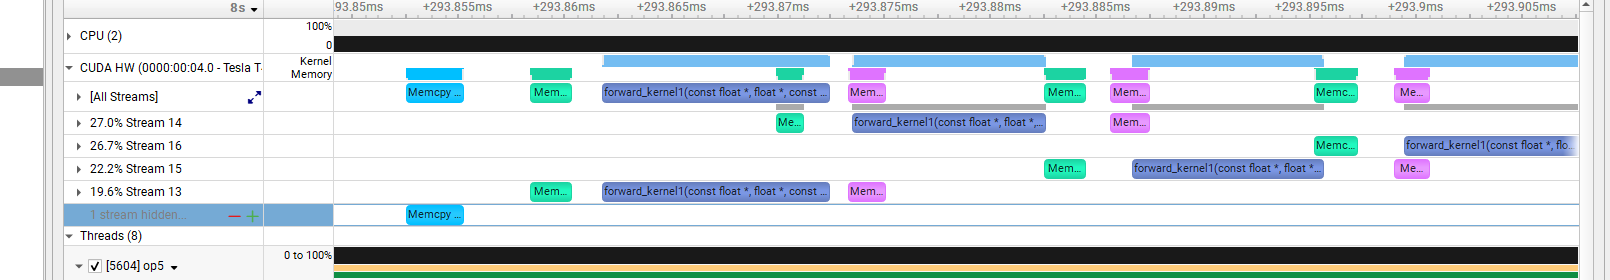

In [22]:
!nsys profile ./op2 64

Dataset loaded successfully:
 - Train samples: 60000
 - Test samples: 10000
Epoch 1 - Loss: 0.849831
Epoch 2 - Loss: 0.553999
Epoch 3 - Loss: 0.498648
Epoch 4 - Loss: 0.469262
Epoch 5 - Loss: 0.449428
Epoch 6 - Loss: 0.434234
Epoch 7 - Loss: 0.42175
Epoch 8 - Loss: 0.411193
Epoch 9 - Loss: 0.40207
Epoch 10 - Loss: 0.393931
Processing time: 10793.3 ms
Model saved to model.bin
Model loaded from model.bin
Test Accuracy: 84.73%
Generating '/tmp/nsys-report-7a99.qdstrm'
[1/1] [========================100%] report4.nsys-rep
Generated:
    /content/report4.nsys-rep


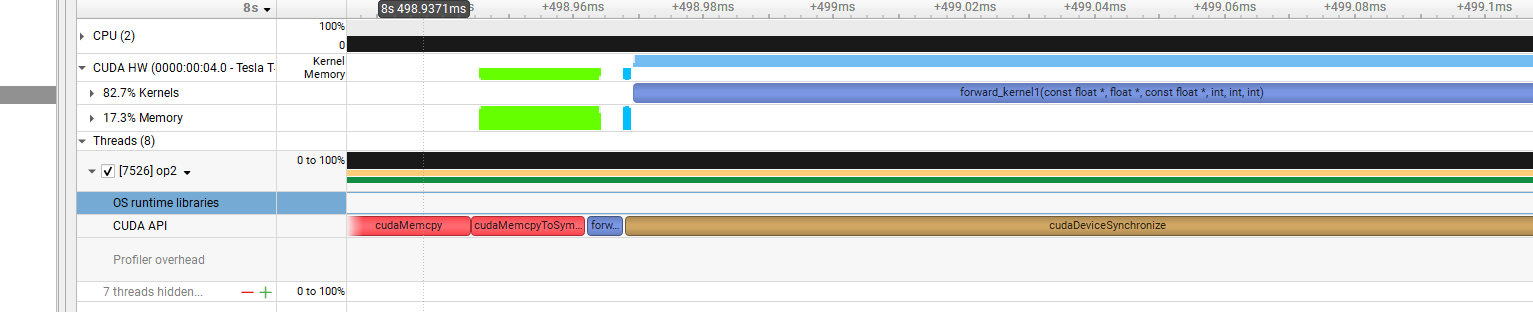

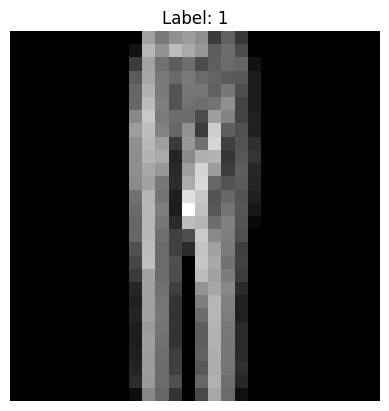

Random image with label 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Choose a random index
random_index = np.random.randint(0, x_train.shape[0])

# Get the image and label
random_image = x_train[random_index]
random_label = y_train[random_index]

# Print the image and label
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.axis('off')  # Hide axes
plt.show()

# Reshape the image to a 1D array
reshaped_image = random_image.reshape(1, -1)

# Convert the reshaped image and its label to a DataFrame
data = pd.DataFrame(reshaped_image)
data['Label'] = random_label

# Save the data to a CSV file
data.to_csv('output_data.csv', index=False,header=False)

print(f"Random image with label {random_label}")


In [ ]:
!nvcc GPU_Run_Predict.cu -o predict

In [ ]:
!./predict

Dataset loaded successfully:
 - Train samples: 0
 - Test samples: 10000
Model loaded from model.bin
Processing time: 161.178 ms
Test Accuracy: 84.11%
Dataset loaded successfully:
 - Train samples: 0
 - Test samples: 1
Label of the first image: 1


# 5. Reflection


* Những khó khăn đã gặp phải
    * ANN impelment from scratch
    * Cuda Debugging
    * Memory Management
    * Kernel Optimization

* Những gì đã học được
    * Using Profiling Tools : `nvprof`, `Nsight`
    * Parallel Computing Concepts
    * Optimization Techniques, strategies
* Nếu có nhiều thời gian hơn, nhóm sẽ:
    * Shuffle Batch
    * Advanced Neural Network Architectures
    * Experiment with New Hardware
    * Fixed point (FP16)
    * Advanced Neural Network Architectures( CNNs or RNNs)

# 6. Tài liệu tham khảo

* [CUDA C++ Programming Guid](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html)
* [BobMcDear/neural-network-cuda: Neural network from scratch in CUDA/C++](https://github.com/BobMcDear/neural-network-cuda/tree/main?tab=readme-ov-file)
* [CUDA Webinar 2](https://developer.download.nvidia.com/assets/cuda/files/reduction.pdf)
* [Slide 1](https://developer.download.nvidia.com/CUDA/training/StreamsAndConcurrencyWebinar.pdf)
* [cross entropy gradient](https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/)